In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
veh= pd.read_csv("vehicle-1.csv") # Loading the dataset.

In [3]:
veh.shape # shape od the dataset.

(846, 19)

In [4]:
veh.head() # to get a general idea of data.

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
veh.info() #Identifying datatype of each columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
veh.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [7]:
veh.isnull().values.any() # To check if there are null values.

True

In [8]:
labelencoder = LabelEncoder()
veh['class_dup'] = labelencoder.fit_transform(veh['class'])
veh 

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

> In the above step, The class was a categorical column. \
  This can't be used in SVM algorithms. Thus the columns elements were given number. \
  Such as bus is 0, Van is 2 and car is 1.

In [9]:
veh.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
class_dup                        0.977541
dtype: float64

In [10]:
veh.drop("class",axis=1,inplace=True)

In [11]:
meanFiller = lambda x: x.fillna(x.mean())
veh = veh.apply(meanFiller,axis=0)


> In the above step null values were replaced with means values of there respective columns \
  and the class clomn was dropped.

### Univariate Analysis

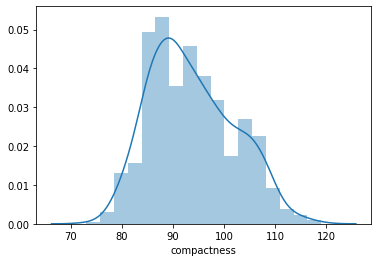

In [12]:
sns.distplot(veh["compactness"])

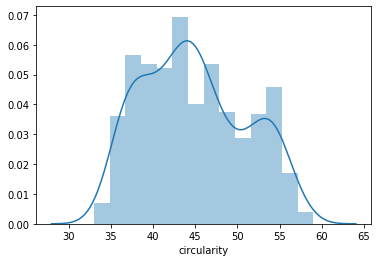

In [13]:
sns.distplot(veh["circularity"])

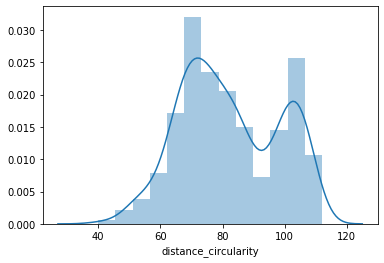

In [14]:
sns.distplot(veh["distance_circularity"])

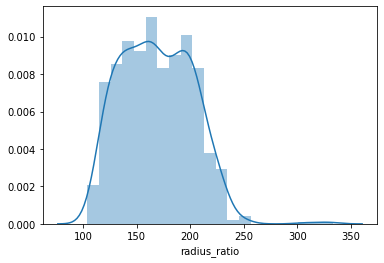

In [15]:
sns.distplot(veh["radius_ratio"])

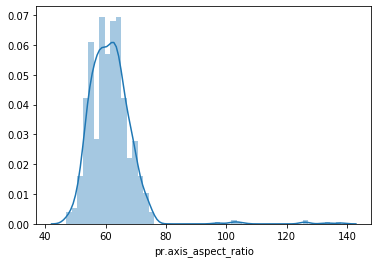

In [16]:
sns.distplot(veh["pr.axis_aspect_ratio"])

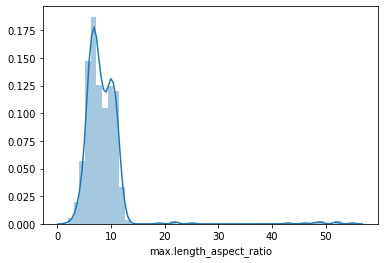

In [17]:
sns.distplot(veh["max.length_aspect_ratio"])

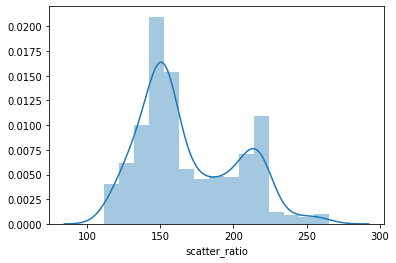

In [18]:
sns.distplot(veh["scatter_ratio"])

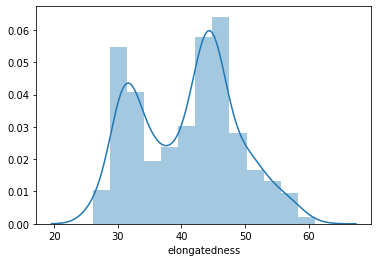

In [19]:
sns.distplot(veh["elongatedness"])

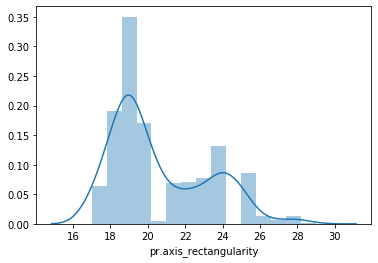

In [20]:
sns.distplot(veh["pr.axis_rectangularity"])

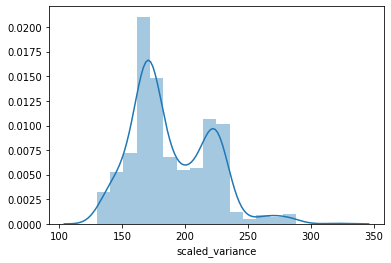

In [21]:
sns.distplot(veh["scaled_variance"])

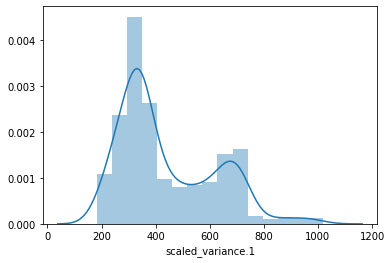

In [22]:
sns.distplot(veh["scaled_variance.1"])

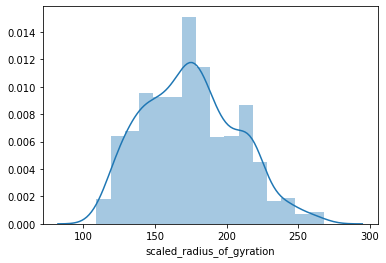

In [23]:
sns.distplot(veh["scaled_radius_of_gyration"])

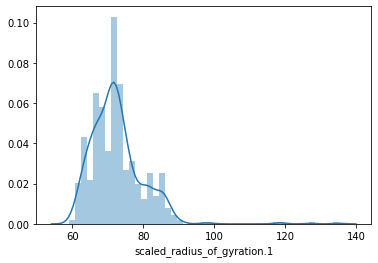

In [24]:
sns.distplot(veh["scaled_radius_of_gyration.1"])

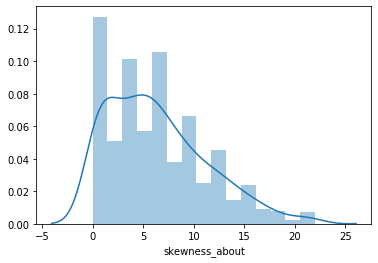

In [25]:
sns.distplot(veh["skewness_about"])

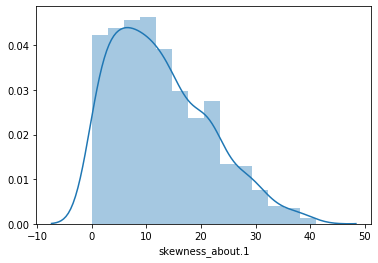

In [26]:
sns.distplot(veh["skewness_about.1"])

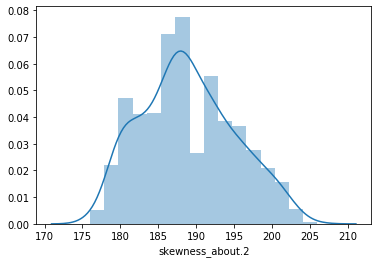

In [27]:
sns.distplot(veh["skewness_about.2"])

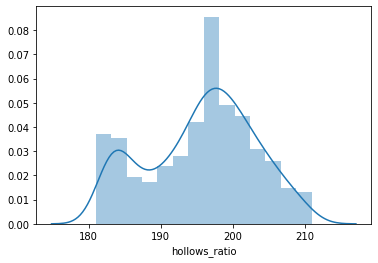

In [28]:
sns.distplot(veh["hollows_ratio"])

# Bivariate Analysis

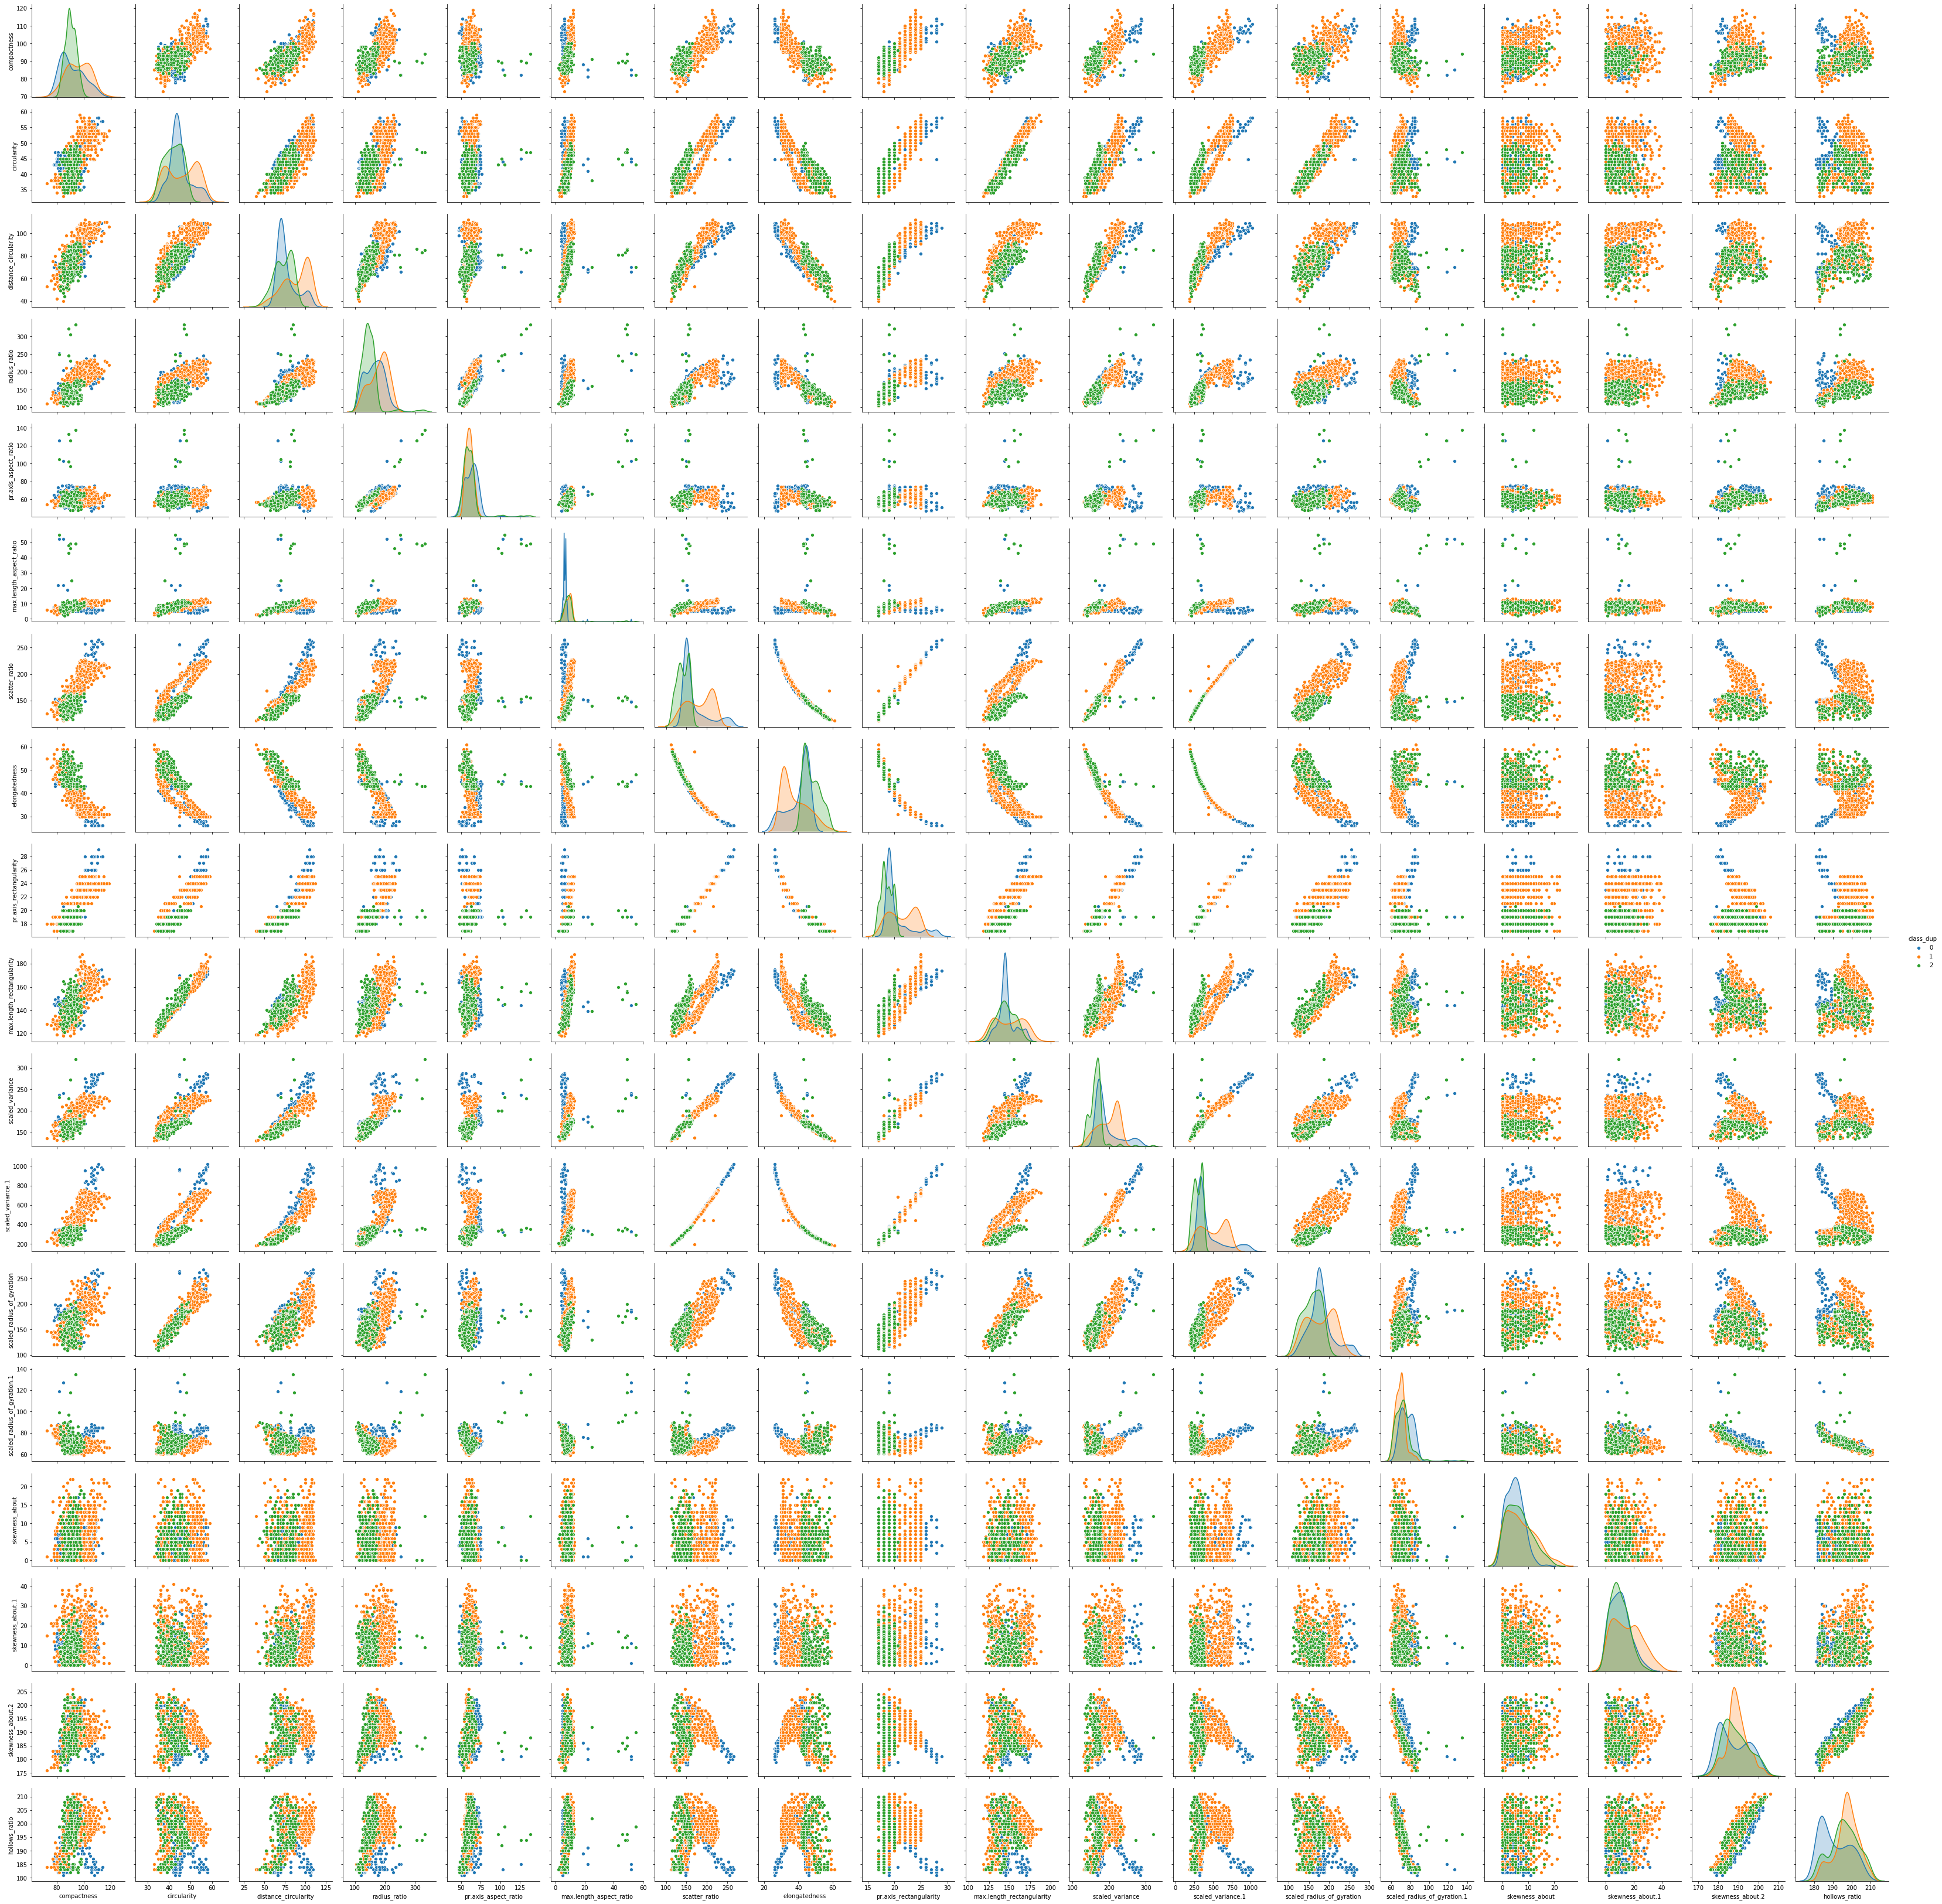

In [29]:
sns.pairplot(veh,hue='class_dup',diag_kind='kde')

### Correlation table

In [30]:
core=veh.corr()
veh.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr.axis_aspect_ratio            0.091704     0.153362              0.158397   
max.length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance.1               0.815901     0.838525              0.887328   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about.1                0.157387    -0.011851              0.265553   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   
class_dup                      -0.033796    -0.159804             -0.064902   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr.axis_aspect_ratio             0.663559              1.000000   
max.length_aspect_ratio          0.450036              0.648704   
scatter_ratio                    0.734228              0.103715   
elongatedness                   -0.789795             -0.183264   
pr.axis_rectangularity           0.708285              0.079395   
max.length_rectangularity        0.569205              0.127128   
scaled_variance                  0.794041              0.273414   
scaled_variance.1                0.720150              0.089620   
scaled_radius_of_gyration        0.536536              0.122111   
scaled_radius_of_gyration.1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about.1                 0.173832             -0.032134   
skewness_about.2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   
class_dup                       -0.182270             -0.098318   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450036       0.734228   
pr.axis_aspect_ratio                        0.648704       0.103715   
max.length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr.axis_rectangularity                      0.161592       0.989370   
max.length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318955       0.948296   
scaled_variance.1                           0.143713       0.993784   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration.1                 0.295574      -0.027985   
skewness_about                            

### Correlation Heatmap

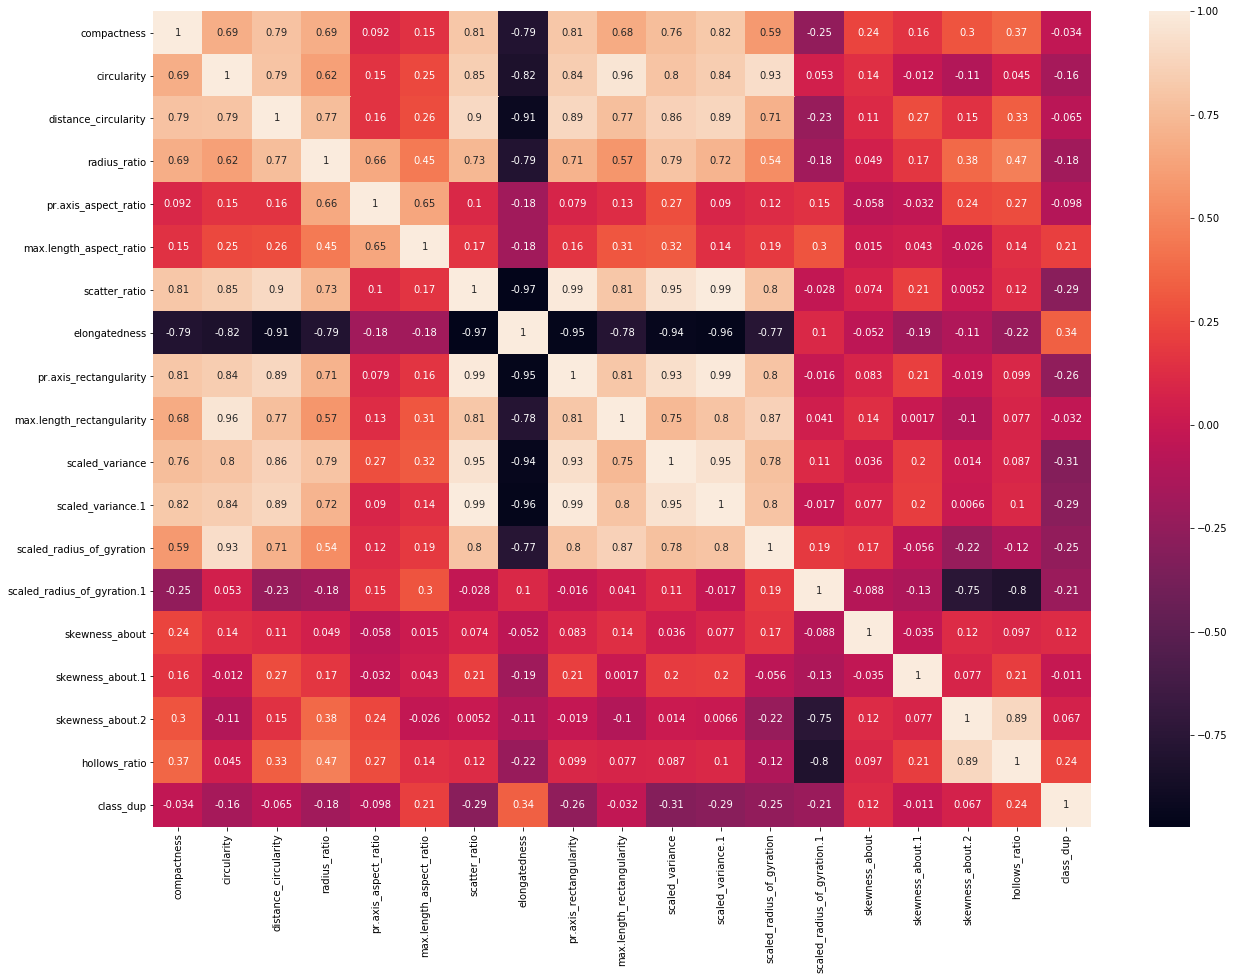

In [31]:
plt.figure(figsize = (21,15))
sns.heatmap(core,annot=True)

> From the bivariate analysis, correlation table and correlation heatmap.\
  The columns the is of least significance to target variable was found. 

### Preprocessing Data for analysis

In [32]:
veh.drop("compactness",axis=1,inplace=True)
veh.drop("distance_circularity",axis=1,inplace=True)
veh.drop("pr.axis_aspect_ratio",axis=1,inplace=True)
veh.drop("max.length_rectangularity",axis=1,inplace=True)
veh.drop("scatter_ratio",axis=1,inplace=True)
veh.drop("pr.axis_rectangularity",axis=1,inplace=True)
veh.drop("skewness_about.2",axis=1,inplace=True)

In [33]:
X= veh.drop(["class_dup"],axis=1,)
Y= veh[["class_dup"]]

In [34]:
XScaled  = X.apply(zscore)  

### Splitting the data into test,train

In [35]:
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.3, random_state=7)

# SVM Analysis 

In [36]:
clf =  SVC(C= .1, kernel='linear', gamma= 1)

In [37]:
clf.fit(x_train , y_train.values.ravel())

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_pred = clf.predict(x_test)

In [39]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8582677165354331


In [40]:
clf =  SVC(C= .1, kernel='rbf', gamma= 1)
clf.fit(x_train , y_train.values.ravel())

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
y_pred = clf.predict(x_test)

In [42]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.531496062992126


In [43]:
clf =  SVC(C= .1, kernel='poly', gamma= 1)
clf.fit(x_train , y_train.values.ravel())

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9133858267716536


In [45]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[ 55   7   4]
 [  3 120   4]
 [  1   3  57]]


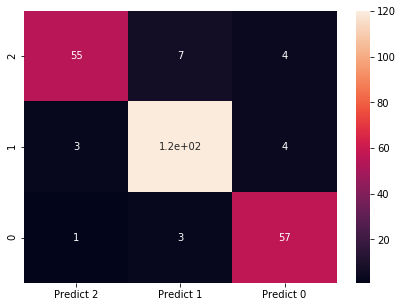

In [46]:
knnm=metrics.confusion_matrix(y_test,y_pred)
knn_m = pd.DataFrame(knnm, index = [i for i in ["2","1","0"]],columns = [i for i in ["Predict 2","Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

In [47]:
print("Classification Report")
print(metrics.classification_report(y_test,y_pred, labels=[2,1, 0]))

Classification Report
              precision    recall  f1-score   support

           2       0.88      0.93      0.90        61
           1       0.92      0.94      0.93       127
           0       0.93      0.83      0.88        66

    accuracy                           0.91       254
   macro avg       0.91      0.90      0.91       254
weighted avg       0.91      0.91      0.91       254



In [48]:
clf =  SVC(C= .1, kernel='sigmoid', gamma= 1)
clf.fit(x_train , y_train.values.ravel())

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.5236220472440944


> After trying the SVM algorithm in the different kernels. 
  Following inference was made:-
- The highest model accuracy is when the algorithm is running in a polynomial kernel.
- The highest accuracy score was 91.
- Confusion matrix and classification reports were found for the same.

## K-fold and cross-validation

In [50]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
clf= SVC(C= .1, kernel='poly', gamma= 1)
model=clf.fit(x_train , y_train.values.ravel())
results = cross_val_score(model, XScaled, Y.values.ravel() , cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.94117647 0.91764706 0.90588235 0.95294118 0.96470588 0.83529412
 0.92857143 0.85714286 0.86904762 0.91666667]
Accuracy: 90.891% (4.039%)


> After using K-fold validation.
- The range of accuracy of the model was from 86% to 94% at a 95% confidence level.

# Identifying Eigen vectors using PCA

In [51]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.62170187  0.25150523 -0.82287347  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527  0.04537164]
 [ 0.62170187  1.00118343  0.45056889 -0.79072934  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.47181974]
 [ 0.25150523  0.45056889  1.00118343 -0.18025396  0.31933203  0.14388275
   0.18992805  0.29592367  0.01545721  0.04354026  0.14408905]
 [-0.82287347 -0.79072934 -0.18025396  1.00118343 -0.93782312 -0.95620413
  -0.76693543  0.10360323 -0.05205875 -0.18591103 -0.21697531]
 [ 0.7977645   0.79498064  0.31933203 -0.93782312  1.00118343  0.94814159
   0.77989661  0.11243163  0.03604752  0.19549063  0.08669654]
 [ 0.83951746  0.72100219  0.14388275 -0.95620413  0.94814159  1.00118343
   0.79701241 -0.0166278   0.07706469  0.20181158  0.10388468]
 [ 0.92798524  0.5371705   0.18992805 -0.76693543  0.77989661  0.79701241
   1.00118343  0.19166642  0.16656805 -0.05603902 -0.1182971 ]
 [ 0.05270433 -0.1810333   0.29592367  0.

In [52]:
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
print(pca.explained_variance_)

[5.18662721 2.05550394 1.17384819 1.05528084 0.88494564 0.32133759]


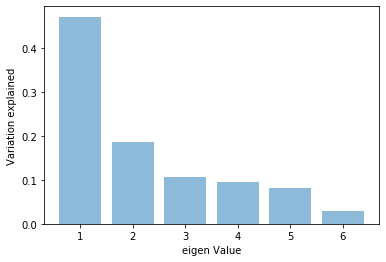

In [54]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [55]:
pca3 = PCA(n_components=6)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.39611623  0.36809097  0.14874228 -0.42089468  0.42119261  0.41767613
   0.37539781 -0.00394397  0.05149428  0.07315524  0.086749  ]
 [ 0.1160752  -0.20374372  0.07430875  0.05260597  0.06271017  0.01894014
   0.22546146  0.6382345  -0.06066981 -0.23779087 -0.64345404]
 [-0.17512039  0.22052399  0.65318935  0.06155997  0.07617988 -0.09618641
  -0.22467436  0.27090577 -0.45675851  0.36913349  0.08027758]
 [ 0.04984377  0.14037895  0.56535966  0.14808997 -0.09600545 -0.18739837
   0.02838387  0.05231413  0.59254708 -0.44522476  0.19756629]
 [-0.07623596 -0.1169546  -0.01159183  0.03607123  0.02585673  0.0410813
  -0.02828491  0.16883607  0.63259572  0.72603927 -0.14178125]
 [-0.52481012  0.39545311 -0.22829585 -0.19894854  0.31027591  0.17083502
  -0.45312434  0.2015486   0.17776456 -0.24707486 -0.11156243]]
[0.47095422 0.18664312 0.10658733 0.09582122 0.08035451 0.02917798]


In [56]:
Xpca3

array([[ 0.12968519, -0.34629014,  0.22002525,  0.17720568,  0.04526196,
        -0.76880923],
       [-1.38405839, -0.43238023, -0.01926176,  0.47611585,  0.51626564,
        -0.19116416],
       [ 2.80683385,  0.23658889, -0.92230398,  1.06053268,  0.48296298,
         0.47390012],
       ...,
       [ 3.3245831 , -0.28744424,  0.18466963,  0.26263644, -1.57503553,
         0.23190269],
       [-2.49331101, -1.01044899,  1.01014057, -1.37892084,  0.2449125 ,
        -0.53232961],
       [-3.77918478,  0.18938257,  0.55137633, -1.1286787 ,  0.16053356,
        -0.33219449]])

In [57]:
Xpca3.shape

(846, 6)

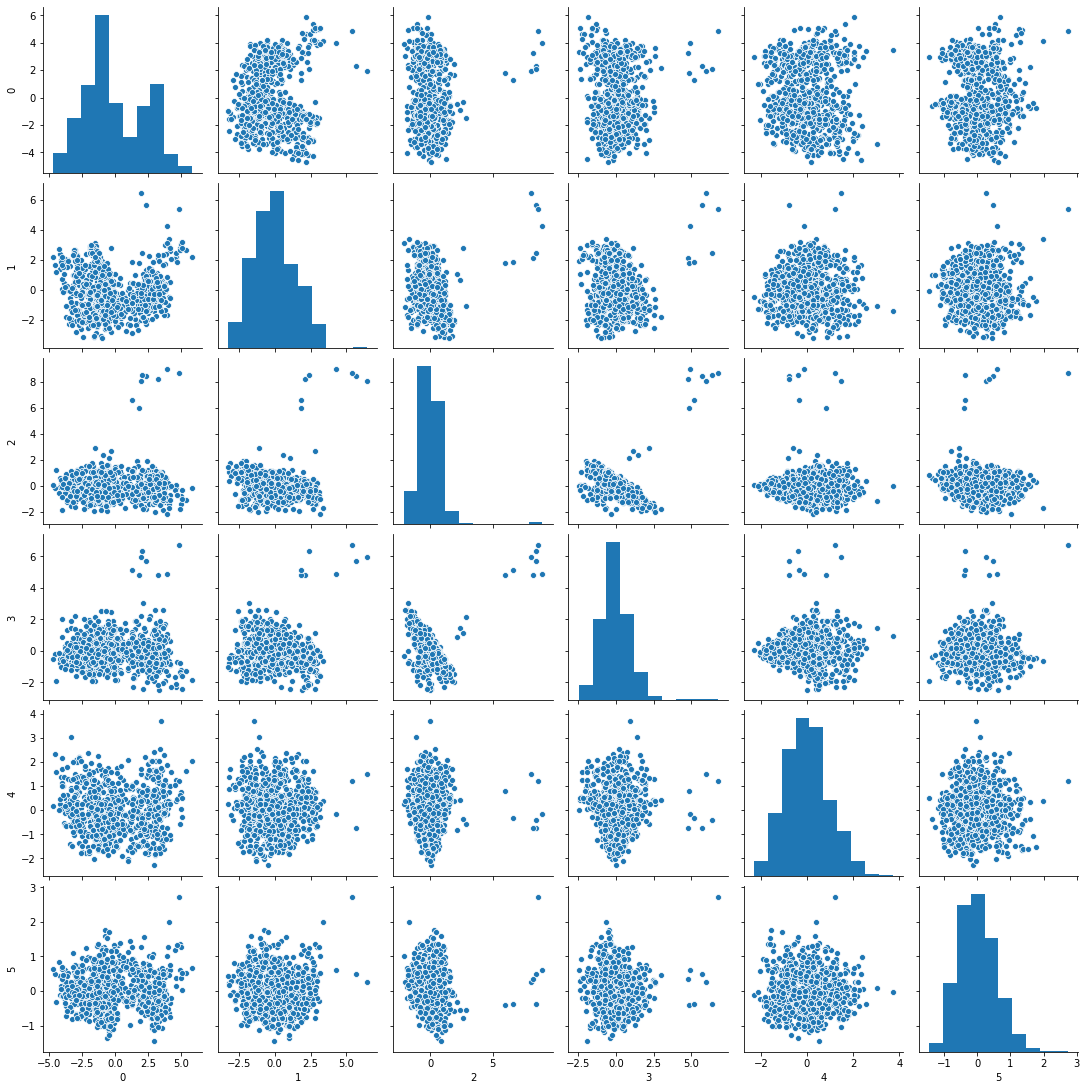

In [58]:
sns.pairplot(pd.DataFrame(Xpca3))

In [59]:
x_train, x_test, y_train, y_test = train_test_split(Xpca3, Y, test_size=0.3, random_state=7)

# SVM Analysis using the eigen vectors

In [60]:
clf =  SVC(C= .1, kernel='linear', gamma= 1)

In [61]:
clf.fit(x_train , y_train.values.ravel())

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
y_pred = clf.predict(x_test)

In [63]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8110236220472441


In [64]:
clf =  SVC(C= .1, kernel='rbf', gamma= 1)
clf.fit(x_train , y_train.values.ravel())
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.5511811023622047


In [65]:
clf =  SVC(C= .1, kernel='poly', gamma= 1)
clf.fit(x_train , y_train.values.ravel())
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8346456692913385


In [66]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[ 42  20   4]
 [  6 116   5]
 [  1   6  54]]


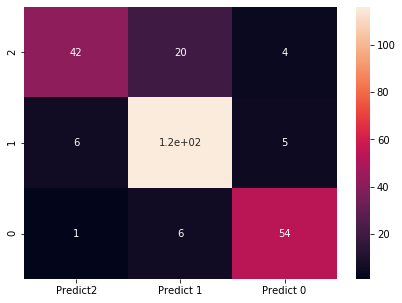

In [67]:
knnm=metrics.confusion_matrix(y_test,y_pred)
knn_m = pd.DataFrame(knnm, index = [i for i in ["2","1","0"]],columns = [i for i in ["Predict2","Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

In [68]:
print("Classification Report")
print(metrics.classification_report(y_test,y_pred, labels=[2,1, 0]))

Classification Report
              precision    recall  f1-score   support

           2       0.86      0.89      0.87        61
           1       0.82      0.91      0.86       127
           0       0.86      0.64      0.73        66

    accuracy                           0.83       254
   macro avg       0.84      0.81      0.82       254
weighted avg       0.84      0.83      0.83       254



In [69]:
clf =  SVC(C= .1, kernel='sigmoid', gamma= 1)
clf.fit(x_train , y_train.values.ravel())
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.5118110236220472


> After running the SVM model with eigenvectors in different kernels.
  The following was inferred.
- The maximum accuracy was again found in the polynomial kernel.
- The accuracy of this model was 83.
- A drop of around 6% was found but this expected as the columns are reduced

## K-fold validadtion with PCA value

In [70]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
clf= SVC(C= .1, kernel='poly', gamma= 1)
model=clf.fit(x_train , y_train.values.ravel())
results = cross_val_score(model, Xpca3, Y.values.ravel() , cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.85882353 0.87058824 0.81176471 0.84705882 0.84705882 0.75294118
 0.80952381 0.82142857 0.82142857 0.89285714]
Accuracy: 83.335% (3.706%)


> After using K-fold validation with eigen vectors.
- The range of accuracy of the model was from 80% to 87% at 95% confidence level.

> Even after only selecting six column that covered 95% of data using PCA.
- The accuracy dropped from 91 to 83
- This is result was within the expected region. 